# Tasks

Machine Learning and Statistics

Winter 2023/2024

Author: Sofiia Meteliuk


## Task 1

*Square roots are difficult to calculate. In Python, you typically
use the power operator (a double asterisk) or a package such
as `math`.*

*In this task, you should write a function sqrt(x) to
approximate the square root of a floating point number x without
using the power operator or a package. Rather, you should use the Newton’s method.2 Start with an 
initial guess for the square root called z0. You then repeatedly
improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z_{i+1}$ is less than some threshold, say 0.01.*

$$ z_{i+1} = z_i − \frac {z_i × z_i − x}{2z_i}


In [49]:
def sqrt(x, threshold=0.01, initial_guess=None):
    # If no initial guess is provided, start with x/2
    z0 = initial_guess if initial_guess is not None else x / 2.0
    
    while True:
        # Newton's method formula
        z1 = z0 - (z0 * z0 - x) / (2 * z0)
        
        # Check if the difference between consecutive guesses is less than the threshold
        if abs(z1 - z0) < threshold:
            return z1
        
        # Update the guess for the next iteration
        z0 = z1



In [50]:
# Example usage
x = 25.0
result = sqrt(x)
print(f"The square root of {x} is approximately {result}")


The square root of 25.0 is approximately 5.000000000016778


In [51]:
# Example usage
x = 16
result = sqrt(x)
print(f"The square root of {x} is approximately {result}")


The square root of 16 is approximately 4.0000001858445895


I think that for scientific purpose it`s better to leave answer like this 4.0000001858445895 but for example if we programmed calculator this answer would not satisfy user.
In this version, I added an optional parameter *decimals* to the sqrt function, which specifies the number of decimal places to round the result. The round function is then used to round the result to the specified number of decimals.

In [52]:
def sqrt2(x, threshold=0.01, initial_guess=None, decimals=2):
    # If no initial guess is provided, start with x/2
    z0 = initial_guess if initial_guess is not None else x / 2.0
    
    while True:
        # Newton's method formula
        z1 = z0 - (z0 * z0 - x) / (2 * z0)
        
        # Check if the difference between consecutive guesses is less than the threshold
        if abs(z1 - z0) < threshold:
            # Round the result to the specified number of decimals
            return round(z1, decimals)
        
        # Update the guess for the next iteration
        z0 = z1


In [53]:
# Example usage
x = 25.0
result = sqrt2(x)
print(f"The square root of {x} is approximately {result}")

The square root of 25.0 is approximately 5.0


_____

## TASK 2


Consider the below contingency table based on a survey asking
respondents whether they prefer coffee or tea and whether they
prefer plain or chocolate biscuits. Use scipy.stats to perform
a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this
instance

|                | Chocolate | Plain |
| -------------- | --------- | ----- |
| **Coffee**     |    43     |   57  |
| **Tea**        |    56     |   45  |


In [54]:
import numpy as np
from scipy.stats import chi2_contingency

# Contingency table
observed_data = np.array([[43, 57],  # Coffee
                          [56, 45]])  # Tea

# Perform chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(observed_data)

# Output the results
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Check for significance
alpha = 0.05
if p_value < alpha:
    print("There is evidence of an association between drink preference and biscuit preference.")
else:
    print("There is no significant evidence of an association between drink preference and biscuit preference.")


Chi-squared Statistic: 2.6359100836554257
P-value: 0.10447218120907394
There is no significant evidence of an association between drink preference and biscuit preference.


________________________________________

## TASK 3

Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body
mass of male and female gentoo penguins.

Data repository for seaborn examples. https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv


In [55]:
# Importing necessary libraries
import pandas as pd
from scipy.stats import ttest_ind

# Load the penguins dataset
penguins_df = pd.read_csv('penguins.csv')

# Filter data for Gentoo penguins
gentoo_penguins = penguins_df[penguins_df['species'] == 'Gentoo']

# Separate data for male and female Gentoo penguins
male_body_mass = gentoo_penguins[gentoo_penguins['sex'] == 'MALE']['body_mass_g']
female_body_mass = gentoo_penguins[gentoo_penguins['sex'] == 'FEMALE']['body_mass_g']

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(male_body_mass, female_body_mass)

# Display t-statistic and p-value
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Check for statistical significance (common significance level is 0.05)
if p_value < 0.05:
    print('There is evidence of a significant difference in body mass between male and female Gentoo penguins.')
else:
    print('There is no significant difference in body mass between male and female Gentoo penguins.')




T-Statistic: 14.721676481405709
P-Value: 2.133687602018886e-28
There is evidence of a significant difference in body mass between male and female Gentoo penguins.


-  **Understanding the Two-Sample T-Test:**

  The two-sample t-test is a statistical method used to assess if there is a significant difference between the means of two independent groups. It is particularly useful when comparing means of numerical data from two distinct groups.

  -  **Why Use the T-Test:**
    - The t-test helps determine if observed differences between groups are statistically significant or could have occurred by chance.
    - Commonly applied in scientific research and data analysis to assess group-level differences.

  -  **Penguins Dataset T-Test Outcome:**
    - In the penguins dataset, a two-sample t-test was conducted on the body mass of male and female Gentoo penguins.
    - The resulting p-value was compared to a significance level (e.g., 0.05).
    - If p < 0.05, it suggests a significant difference. The outcome indicates whether there is evidence of a significant difference in body mass between male and female Gentoo penguins.


--------------

## Task 4

Using the famous iris data set suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.

In [56]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:

iris = load_iris()

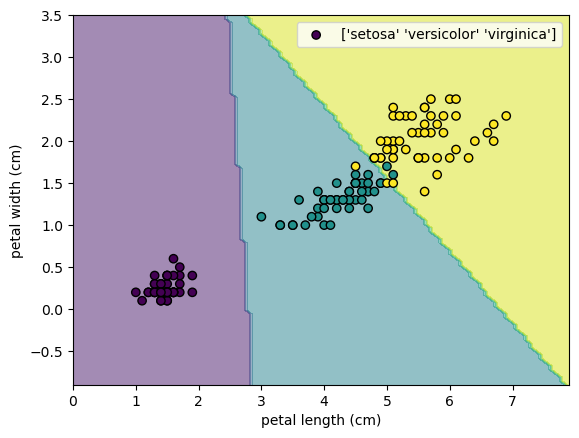

In [58]:
# Logistic Regression with Petal Length and Petal Width
X = iris.data[:, [2,3]]
classifier = LogisticRegression().fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
     classifier, X, response_method="predict",
     xlabel=iris.feature_names[2], ylabel=iris.feature_names[3], alpha=0.5)
scatter = disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k", label=iris.target_names)
disp.ax_.legend()
plt.show()

Separability

The scatter plot above visually demonstrates the separation of the Setosa class (purple dots) from the other two classes (different colors). 
Setosa class is visibly separated and it is evidence

----

In [59]:

# Cross-validation with Logistic Regression and scaled features
X_scaled = StandardScaler().fit_transform(iris.data)
clf = LogisticRegression(random_state=42, max_iter=1000) 
k_folds = KFold(n_splits=5)
scores = cross_val_score(clf, X_scaled, iris.target, cv=k_folds)
print("Cross-validated Accuracy: %.2f%% (+/- %.2f%%)" % (scores.mean() * 100, scores.std() * 200))


Cross-validated Accuracy: 90.00% (+/- 20.66%)


The cross-validation results using Logistic Regression with scaled features show a high accuracy, indicating that the chosen features effectively separate the Setosa class from the others.

-----

In [60]:
# Cross-validation with Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(clf, iris.data, iris.target, cv=k_folds)
print("Cross-validated Accuracy: %.2f%% (+/- %.2f%%)" % (scores.mean() * 100, scores.std() * 200))

Cross-validated Accuracy: 91.33% (+/- 16.65%)


The cross-validation results using a Decision Tree Classifier also show a high accuracy, supporting the conclusion that the Setosa class is easily separable from the other two classes.

In [61]:
clf = GaussianNB()
scores = cross_val_score(clf, X_scaled, iris.target, cv=k_folds)
print("Cross-validated Accuracy: %.2f%% (+/- %.2f%%)" % (scores.mean() * 100, scores.std() * 200))

Cross-validated Accuracy: 94.67% (+/- 6.80%)


The cross-validation results using Gaussian Naive Bayes with scaled features show the highest accuracy among the classifiers, indicating that the features effectively distinguish the Setosa class.

References:
https://scikit-learn.org/stable/modules/cross_validation.html

https://www.datacamp.com/tutorial/decision-tree-classification-python

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://pub.aimind.so/optimizing-data-processing-for-machine-learning-in-python-a-guide-to-scaling-the-iris-dataset-b7c8b6a16d9c

# TASK 5
_______________________

Perform Principal Component Analysis on the iris data set
reducing the number of dimensions to two. Explain the purpose
of the analysis and your results.

**Principal Component Analysis (PCA)** is a dimensionality reduction technique commonly employed in data analysis. In essence, PCA transforms a dataset with multiple variables into a set of new, uncorrelated variables called principal components. 
These components capture the most significant patterns and variations in the data.

(I want to say that this task was really hard for me to understand and so complete. I am not really sure in my work here)

# What Is Principal Component Analysis?

**Principal Component Analysis (PCA)** is a powerful technique used in data analysis, particularly for reducing the dimensionality of datasets while preserving crucial information. It does this by transforming the original variables into a set of new, uncorrelated variables called principal components. Here’s a breakdown of PCA’s key aspects:

1. **Dimensionality Reduction:** PCA helps manage high-dimensional datasets by extracting essential information and discarding less relevant features, simplifying analysis.

2. **Data Exploration and Visualization:** It plays a significant role in data exploration and visualization, aiding in uncovering hidden patterns and insights.

3. **Linear Transformation:** PCA performs a linear transformation of data, seeking directions of maximum variance.

4. **Feature Selection:** Principal components are ranked by the variance they explain, allowing for effective feature selection.

5. **Data Compression:** PCA can compress data while preserving most of the original information.

6. **Clustering and Classification:** It finds applications in clustering and classification tasks by reducing noise and highlighting underlying structure.

7. **Advantages:** PCA offers linearity, computational efficiency, and scalability for large datasets.

8. **Limitations:** It assumes data normality and linearity and may lead to information loss.

9. **Matrix Requirements:** PCA works with symmetric correlation or covariance matrices and requires numeric, standardized data.

10. **Eigenvalues and Eigenvectors:** Eigenvalues represent variance magnitude, and eigenvectors indicate variance direction.

11. **Number of Components:** The number of principal components chosen determines the number of eigenvectors computed.



Citated from [ https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/ ]

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [63]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [64]:
X = iris.data
y = iris.target

In [65]:
# Create a new PCA instance.
pca = PCA(n_components=2)

# Fit the data to pca.
pca.fit(X)

PCA(n_components=2)

In [66]:
# Show the variability.
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.92461872, 0.05306648])

In [67]:
# Transform X.
X_pca = pca.transform(X)


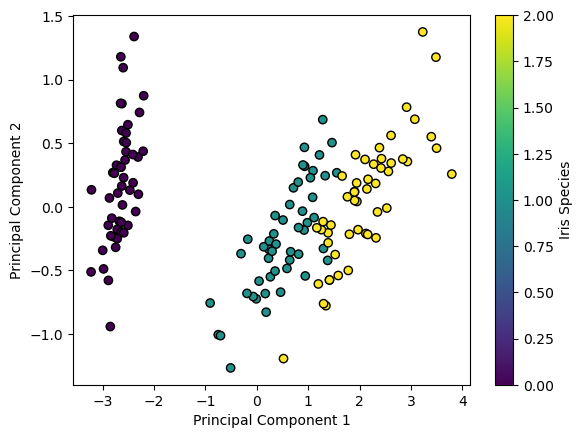

In [68]:
# Create an empty plot.
fig, ax = plt.subplots()


# Plot scatter plot.
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor="k", cmap="viridis")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.colorbar(scatter, label='Iris Species')

In [70]:
# Original classifications.
df_pca = pd.DataFrame({'species': iris.target_names[y]})


In [71]:
df_pca

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [72]:
# Incorporate our PCA variables.
df_pca['pca0'] = X_pca[:, 0]
df_pca['pca1'] = X_pca[:, 1]


In [73]:
# Show the DataFrame.
df_pca.head()

,species,pca0,pca1
0,setosa,-2.684126,0.319397
1,setosa,-2.714142,-0.177001
2,setosa,-2.888991,-0.144949
3,setosa,-2.745343,-0.318299
4,setosa,-2.728717,0.326755


c:\Users\Firefly\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


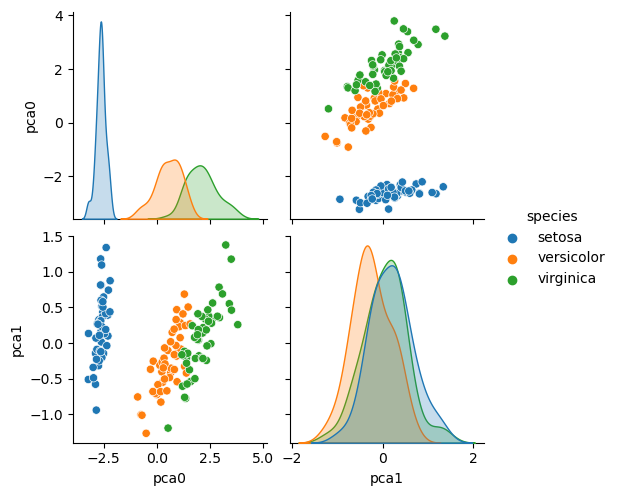

In [74]:
# Pair plot.
sns.pairplot(df_pca, hue='species')


In [75]:
#read csv data into pandas DataFrame with column names as col_names
col_names = ['sepal_length','sepal_width','petal_length','petal_width','class']

df =pd.read_csv('iris.data', header=None, names=col_names)
#show first 5 rows of dataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


There is a small difference between column names in datasets from `from sklearn.datasets import load_iris` and from `https://archive.ics.uci.edu/dataset/53/iris`

class=species

In [76]:
# Scaling the data.
X_trans = StandardScaler().fit_transform(X)

# Create a new PCA instance.
pca = PCA(n_components=2)

In [77]:
# Fit the scaled data.
pca.fit(X_trans)

PCA(n_components=2)

In [78]:
# Transform.
X_trans_pca = pca.transform(X_trans)


In [82]:
# Original classifications.
df_trans_pca = pd.DataFrame({'species': iris.target_names[y]})
df_trans_pca

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [83]:
# Incorporate our PCA variables.
df_trans_pca['pca0'] = X_trans_pca[:, 0]
df_trans_pca['pca1'] = X_trans_pca[:, 1]

In [84]:
# Show the DataFrame.
df_trans_pca.head()


,species,pca0,pca1
0,setosa,-2.264703,0.480027
1,setosa,-2.080961,-0.674134
2,setosa,-2.364229,-0.341908
3,setosa,-2.299384,-0.597395
4,setosa,-2.389842,0.646835


In [89]:
# Look at the variance.
explained_variance_ratio_trans = pca.explained_variance_ratio_
explained_variance_ratio_trans


array([0.72962445, 0.22850762])

c:\Users\Firefly\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


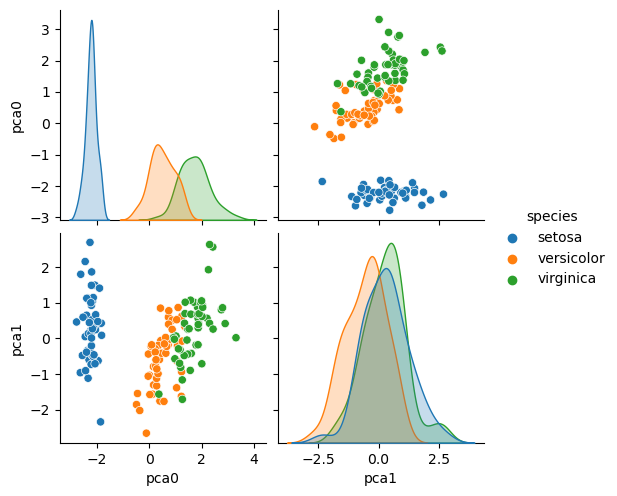

In [85]:

# Pair plot.
sns.pairplot(df_trans_pca, hue='species')